# House price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

np.random.seed(12345)

#### Preparing the data

In [2]:
train_set = pd.read_csv('data/train.csv')
test_set = pd.read_csv('data/test.csv')

In [3]:
overview = train_set.describe()
test_overview = test_set.describe()
overview

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
print("All features:\n{}".format(train_set.columns))
print("\nFeatures in overview:\n{}".format(overview.columns))

All features:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In the overview there are noticeably fewer features than in the whole set. The reason for that is mostly those excluded features being non-numerical. For the sake of simplicity we will only consider those features listed in the overview.

In [5]:
train_set = train_set[overview.columns.tolist()]
test_set = test_set[overview.columns.tolist()[:-1]]

In [6]:
overview.loc['count']

Id               1460.0
MSSubClass       1460.0
LotFrontage      1201.0
LotArea          1460.0
OverallQual      1460.0
OverallCond      1460.0
YearBuilt        1460.0
YearRemodAdd     1460.0
MasVnrArea       1452.0
BsmtFinSF1       1460.0
BsmtFinSF2       1460.0
BsmtUnfSF        1460.0
TotalBsmtSF      1460.0
1stFlrSF         1460.0
2ndFlrSF         1460.0
LowQualFinSF     1460.0
GrLivArea        1460.0
BsmtFullBath     1460.0
BsmtHalfBath     1460.0
FullBath         1460.0
HalfBath         1460.0
BedroomAbvGr     1460.0
KitchenAbvGr     1460.0
TotRmsAbvGrd     1460.0
Fireplaces       1460.0
GarageYrBlt      1379.0
GarageCars       1460.0
GarageArea       1460.0
WoodDeckSF       1460.0
OpenPorchSF      1460.0
EnclosedPorch    1460.0
3SsnPorch        1460.0
ScreenPorch      1460.0
PoolArea         1460.0
MiscVal          1460.0
MoSold           1460.0
YrSold           1460.0
SalePrice        1460.0
Name: count, dtype: float64

Apparently some values are missing. Nevertheless, the amount of missing data is not that frightening, so we can drop those rows.

In [7]:
train_set_nadropped = train_set.dropna(how='any')
train_set_nadropped.describe().loc['count'][0]

1121.0

Indeed, we are left with 1121 rows (out of 1460), which is fine enough for parameter tuning purposes.

In [8]:
X = train_set_nadropped.drop('SalePrice', axis=1)
y = train_set_nadropped['SalePrice']

In [9]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#### Model foundation

In order to predict the house prices the random forest regressor will be used. Another advantage of such an approach is that it deals well with the missing values.

Moreover, due to high number of features in a given set of data, we will extract 8 or 9 of those (giving the best results) for the final model.

The accuracy will be measured using the Mean Absolut Error estimate (MAE).

In [10]:
def get_mae_parameterwise(
        train_X=train_X, val_X=val_X, train_y=train_y, val_y=val_y, **kwargs):
    
    model = RandomForestRegressor(**kwargs, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

#### Extracting the most indicative features

First off, we are going to choose the best subset of features to predict, that is yielding the lowest MAE. We will draw 100 times random subsets of features and test their score. The subset with the lowest MAE will be used in next step. 

In [11]:
# We exclude 'Id' and 'SalePrice' features (obviously)
features = overview.columns[1:-1].tolist()

In [12]:
n_prechoosing = 250
lowest_mae = None
best_subset = None
best_idxs = None

for i in range(n_prechoosing):
    idxs = sorted(np.random.choice(len(features), 8, replace=False))
    subset = np.take(features, idxs).tolist()
    
    X_sub = X[subset]
    train_X_sub, val_X_sub, train_y_sub, val_y_sub = (
        train_test_split(X_sub, y, random_state=1)
    )
    mae = get_mae_parameterwise(
        train_X_sub, val_X_sub, train_y_sub, val_y_sub,
        max_leaf_nodes=None, n_estimators=100
    )
    if (not best_subset) or mae < lowest_mae:
        best_subset = subset
        best_idxs = idxs
        lowest_mae = mae
    
    if (i+1) % 10 == 0:
        print("[{}/{}] done. Best MAE: {}.".format((i+1), n_prechoosing, lowest_mae))

[10/250] done. Best MAE: 23035.8415599051.
[20/250] done. Best MAE: 23035.8415599051.
[30/250] done. Best MAE: 20682.804356888664.
[40/250] done. Best MAE: 20682.804356888664.
[50/250] done. Best MAE: 20682.804356888664.
[60/250] done. Best MAE: 20682.804356888664.
[70/250] done. Best MAE: 20682.804356888664.
[80/250] done. Best MAE: 20682.804356888664.
[90/250] done. Best MAE: 20682.804356888664.
[100/250] done. Best MAE: 20682.804356888664.
[110/250] done. Best MAE: 20682.804356888664.
[120/250] done. Best MAE: 20682.804356888664.
[130/250] done. Best MAE: 20682.804356888664.
[140/250] done. Best MAE: 20682.804356888664.
[150/250] done. Best MAE: 19626.377366548048.
[160/250] done. Best MAE: 19626.377366548048.
[170/250] done. Best MAE: 19626.377366548048.
[180/250] done. Best MAE: 19626.377366548048.
[190/250] done. Best MAE: 19626.377366548048.
[200/250] done. Best MAE: 19626.377366548048.
[210/250] done. Best MAE: 19626.377366548048.
[220/250] done. Best MAE: 19626.377366548048.
[

In [13]:
print("So far best subset's MAE:", lowest_mae)
print(best_subset)

So far best subset's MAE: 19626.377366548048
['MSSubClass', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'MiscVal']


Now, we will try replacing every feature in the set in order to find the best MAE.

In [14]:
currently_in_use = [(1 if i in best_idxs else 0) for i in range(len(features))]
currently_in_use = np.array(currently_in_use, dtype=np.int32)

In [15]:
for u in range(3):
    for i in range(len(best_idxs)):
        current = best_idxs[i]

        for j in range(len(currently_in_use)):
            if not currently_in_use[j]:
                idxs = list(best_idxs)
                idxs[i] = j
                subset = np.take(features, idxs).tolist()

                X_sub = X[subset]
                train_X_sub, val_X_sub, train_y_sub, val_y_sub = (
                    train_test_split(X_sub, y, random_state=1)
                )
                mae = get_mae_parameterwise(
                    train_X_sub, val_X_sub, train_y_sub, val_y_sub,
                    max_leaf_nodes=None, n_estimators=100
                )
                if (not best_subset) or mae < lowest_mae:
                    best_subset = subset
                    best_idxs = idxs
                    lowest_mae = mae
                    currently_in_use[current] = 0
                    currently_in_use[j] = 1
                    current = j

        print("[{}/{}] done. Best MAE: {}.".format((i+1), len(best_idxs), lowest_mae))
    print("Iteration [{}] done.".format(u+1))

[1/8] done. Best MAE: 19626.377366548048.
[2/8] done. Best MAE: 19240.92109430605.
[3/8] done. Best MAE: 19240.92109430605.
[4/8] done. Best MAE: 19240.92109430605.
[5/8] done. Best MAE: 18609.26140569395.
[6/8] done. Best MAE: 18609.26140569395.
[7/8] done. Best MAE: 18609.26140569395.
[8/8] done. Best MAE: 18225.80681494662.
Iteration [1] done.
[1/8] done. Best MAE: 18225.80681494662.
[2/8] done. Best MAE: 18225.80681494662.
[3/8] done. Best MAE: 18225.80681494662.
[4/8] done. Best MAE: 18225.80681494662.
[5/8] done. Best MAE: 18225.80681494662.
[6/8] done. Best MAE: 18225.80681494662.
[7/8] done. Best MAE: 18225.80681494662.
[8/8] done. Best MAE: 18225.80681494662.
Iteration [2] done.
[1/8] done. Best MAE: 18225.80681494662.
[2/8] done. Best MAE: 18225.80681494662.
[3/8] done. Best MAE: 18225.80681494662.
[4/8] done. Best MAE: 18225.80681494662.
[5/8] done. Best MAE: 18225.80681494662.
[6/8] done. Best MAE: 18225.80681494662.
[7/8] done. Best MAE: 18225.80681494662.
[8/8] done. Best

In [16]:
print("So far best subset's MAE:", lowest_mae)
print(best_subset)

So far best subset's MAE: 18225.80681494662
['MSSubClass', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'GarageArea', 'BsmtFinSF2']


Examine if adding 9th feature to the model can possibly improve the error rate.

In [17]:
new_best_idxs = None

for i in range(len(currently_in_use)):
    if currently_in_use[i]: continue
        
    idxs = sorted(list(best_idxs) + [i, j])
    subset = np.take(features, idxs).tolist()

    X_sub = X[subset]
    train_X_sub, val_X_sub, train_y_sub, val_y_sub = (
    train_test_split(X_sub, y, random_state=1)
    )
    mae = get_mae_parameterwise(
        train_X_sub, val_X_sub, train_y_sub, val_y_sub,
        max_leaf_nodes=None, n_estimators=100
    )
    if (not best_subset) or mae < lowest_mae:
        best_subset = subset
        new_best_idxs = idxs
        lowest_mae = mae
        print("New best MAE: {}".format(lowest_mae))

if new_best_idxs:
    best_idxs = new_best_idxs

In [18]:
print("Best found subset's MAE:", lowest_mae)
print(best_subset)

Best found subset's MAE: 18225.80681494662
['MSSubClass', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'GarageArea', 'BsmtFinSF2']


#### Tuning Random Forest parameters

We will tune following parameters:
* criterion
* max_leaf_nodes
* n_estimators

However, with constrained set of features, we can reassess the training data and reclaim some of the former NA rows.

In [19]:
train_set_nadropped = train_set[best_subset + ['SalePrice']].dropna(how='any')
train_set_nadropped

,MSSubClass,OverallCond,YearBuilt,BsmtFinSF1,Fireplaces,GrLivArea,GarageArea,BsmtFinSF2,SalePrice
0,60,5,2003,706,0,1710,548,0,208500
1,20,8,1976,978,1,1262,460,0,181500
2,60,5,2001,486,1,1786,608,0,223500
3,70,5,1915,216,1,1717,642,0,140000
4,60,5,2000,655,1,2198,836,0,250000
...,...,...,...,...,...,...,...,...,...
1455,60,5,1999,0,1,1647,460,0,175000
1456,20,6,1978,790,2,2073,500,163,210000
1457,70,9,1941,275,2,2340,252,0,266500
1458,20,6,1950,49,0,1078,240,1029,142125


In [20]:
X = train_set_nadropped.drop('SalePrice', axis=1)
y = train_set_nadropped['SalePrice']

In [21]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#### Parameter tuning: criterion

In [22]:
# MAE criterion
mae_a = get_mae_parameterwise(train_X, val_X, train_y, val_y, 
                              criterion='mae', max_leaf_nodes=None, n_estimators=100)

# MSE criterion
mae_s = get_mae_parameterwise(train_X, val_X, train_y, val_y,
                              criterion='mse', max_leaf_nodes=None, n_estimators=100)

In [23]:
print("MAE criterion:", mae_a)
print("MSE criterion:", mae_s)

MAE criterion: 18417.309328767125
MSE criterion: 18248.91902413568


We choose best of the above.

In [24]:
best_criterion = 'mae' if mae_a < mae_s else 'mse'

#### Parameter tuning: max_leaf_nodes

In [25]:
xs = np.arange(20, 151, 10, dtype=np.int32)

In [26]:
maes = [get_mae_parameterwise(train_X, val_X, train_y, val_y,
                              criterion=best_criterion, max_leaf_nodes=nodes, n_estimators=100)
        for nodes in xs]

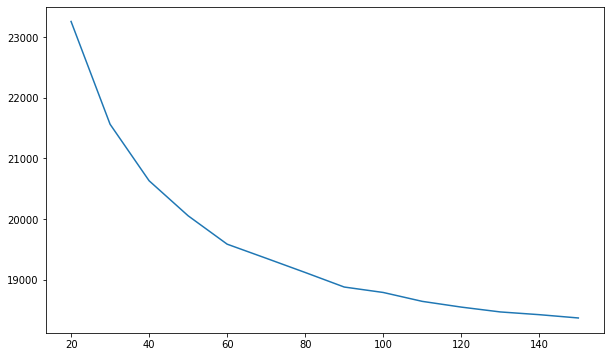

In [27]:
fig = plt.figure(figsize=(10, 6))
plt.plot(xs, maes)
plt.show()

In [28]:
best_max_nodes = xs[np.argmin(maes)]
print(best_max_nodes)

if best_max_nodes >= 140:
    best_max_nodes = None

150


#### Parameter tuning: n_estimators

In [29]:
xs = np.arange(50, 201, 10, dtype=np.int32)

In [30]:
maes = [get_mae_parameterwise(train_X, val_X, train_y, val_y,
                              criterion=best_criterion, max_leaf_nodes=best_max_nodes, n_estimators=ests)
        for ests in xs]

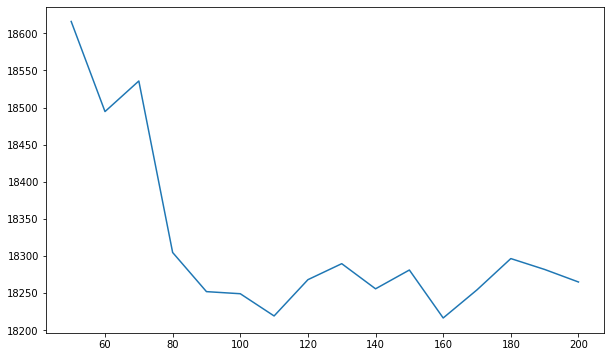

In [31]:
fig = plt.figure(figsize=(10, 6))
plt.plot(xs, maes)
plt.show()

In [32]:
best_n_ests = xs[np.argmin(maes)]
print(best_n_ests)

160


#### Model testing

In [33]:
model_test = RandomForestRegressor(criterion=best_criterion, max_leaf_nodes=best_max_nodes,
                                   n_estimators=best_n_ests, random_state=1)

In [34]:
model_test.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=160,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [35]:
preds_val = model_test.predict(val_X)
mae = mean_absolute_error(val_y, preds_val)
print("MAE:", mae)

MAE: 18414.681505422377


#### Final model fitting

In [36]:
model = RandomForestRegressor(criterion=best_criterion, max_leaf_nodes=best_max_nodes,
                              n_estimators=best_n_ests, random_state=1)

In [37]:
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=160,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

## Prediction

In [38]:
print("Number of rows containing non-NA data in test dataset")
for feature in best_subset:
    print("Feature '{}':\t{}".format(
        feature, int(test_overview.loc['count'][feature]))
    )

Number of rows containing non-NA data in test dataset
Feature 'MSSubClass':	1459
Feature 'OverallCond':	1459
Feature 'YearBuilt':	1459
Feature 'BsmtFinSF1':	1458
Feature 'Fireplaces':	1459
Feature 'GrLivArea':	1459
Feature 'GarageArea':	1458
Feature 'BsmtFinSF2':	1458


In the test set, there are still some missing data - albeit not many. Therefore, we will replace them with median values.

In [39]:
test_set_nadropped = test_set[best_subset].fillna(test_set.median())

In [40]:
test_set_nadropped.describe()

,MSSubClass,OverallCond,YearBuilt,BsmtFinSF1,Fireplaces,GrLivArea,GarageArea,BsmtFinSF2
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000
mean,57.378341,5.553804,1971.357779,439.142906,0.58122,1486.045922,472.773818,52.583276
std,42.746880,1.113740,30.390071,455.117812,0.64742,485.566099,216.974247,176.698671
min,20.000000,1.000000,1879.000000,0.000000,0.00000,407.000000,0.000000,0.000000
25%,20.000000,5.000000,1953.000000,0.000000,0.00000,1117.500000,318.000000,0.000000
50%,50.000000,5.000000,1973.000000,350.500000,0.00000,1432.000000,480.000000,0.000000
75%,70.000000,6.000000,2001.000000,752.000000,1.00000,1721.000000,576.000000,0.000000
max,190.000000,9.000000,2010.000000,4010.000000,4.00000,5095.000000,1488.000000,1526.000000


In [41]:
test_X = test_set_nadropped

In [42]:
predictions = model.predict(test_X)

In [43]:
output = pd.DataFrame({'Id': test_set.Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)